In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv("heart_data.csv", sep=",")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [38]:
df.shape

(299, 13)

In [39]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1A3683B8>,
      dtype=object)

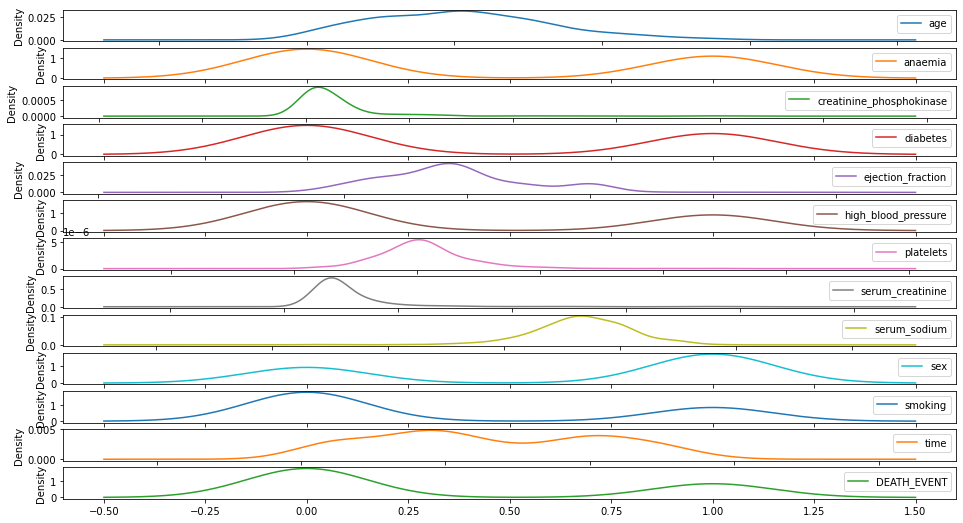

In [40]:
df.plot(kind="density", subplots=True, figsize=(16, 9), sharex=False)

<Figure size 1152x648 with 0 Axes>

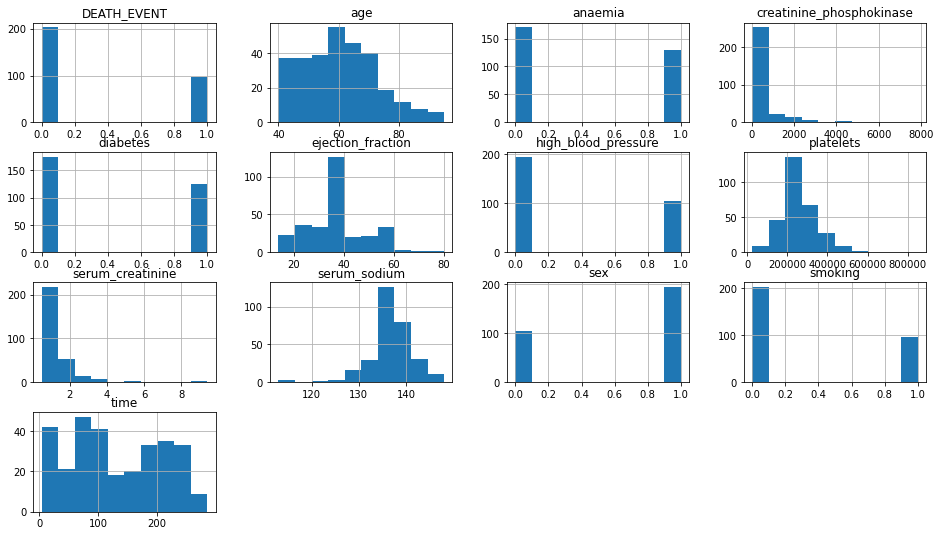

In [41]:
plt.figure(figsize=(16, 9))
df.hist(figsize=(16, 9), linewidth=12)
plt.show()

age                            AxesSubplot(0.125,0.125;0.0503247x0.755)
anaemia                      AxesSubplot(0.18539,0.125;0.0503247x0.755)
creatinine_phosphokinase    AxesSubplot(0.245779,0.125;0.0503247x0.755)
diabetes                    AxesSubplot(0.306169,0.125;0.0503247x0.755)
ejection_fraction           AxesSubplot(0.366558,0.125;0.0503247x0.755)
high_blood_pressure         AxesSubplot(0.426948,0.125;0.0503247x0.755)
platelets                   AxesSubplot(0.487338,0.125;0.0503247x0.755)
serum_creatinine            AxesSubplot(0.547727,0.125;0.0503247x0.755)
serum_sodium                AxesSubplot(0.608117,0.125;0.0503247x0.755)
sex                         AxesSubplot(0.668506,0.125;0.0503247x0.755)
smoking                     AxesSubplot(0.728896,0.125;0.0503247x0.755)
time                        AxesSubplot(0.789286,0.125;0.0503247x0.755)
DEATH_EVENT                 AxesSubplot(0.849675,0.125;0.0503247x0.755)
dtype: object

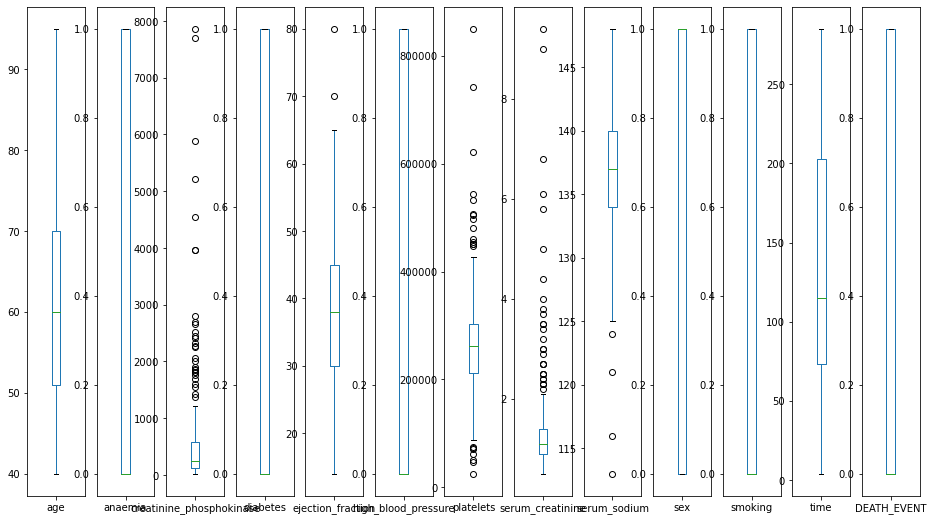

In [42]:
df.plot(kind="box", subplots=True, figsize=(16, 9))

## Removing Outliers

In [61]:
upper_limit = df.creatinine_phosphokinase.mean() + df.creatinine_phosphokinase.std()
upper_limit = upper_limit*2
upper_limit

1857.2179936737552

In [62]:
lower_limit = 0

In [63]:
df = df[(df.creatinine_phosphokinase < upper_limit) & (df.creatinine_phosphokinase > lower_limit)]
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1


In [65]:
df.shape

(279, 13)

age                            AxesSubplot(0.125,0.125;0.0503247x0.755)
anaemia                      AxesSubplot(0.18539,0.125;0.0503247x0.755)
creatinine_phosphokinase    AxesSubplot(0.245779,0.125;0.0503247x0.755)
diabetes                    AxesSubplot(0.306169,0.125;0.0503247x0.755)
ejection_fraction           AxesSubplot(0.366558,0.125;0.0503247x0.755)
high_blood_pressure         AxesSubplot(0.426948,0.125;0.0503247x0.755)
platelets                   AxesSubplot(0.487338,0.125;0.0503247x0.755)
serum_creatinine            AxesSubplot(0.547727,0.125;0.0503247x0.755)
serum_sodium                AxesSubplot(0.608117,0.125;0.0503247x0.755)
sex                         AxesSubplot(0.668506,0.125;0.0503247x0.755)
smoking                     AxesSubplot(0.728896,0.125;0.0503247x0.755)
time                        AxesSubplot(0.789286,0.125;0.0503247x0.755)
DEATH_EVENT                 AxesSubplot(0.849675,0.125;0.0503247x0.755)
dtype: object

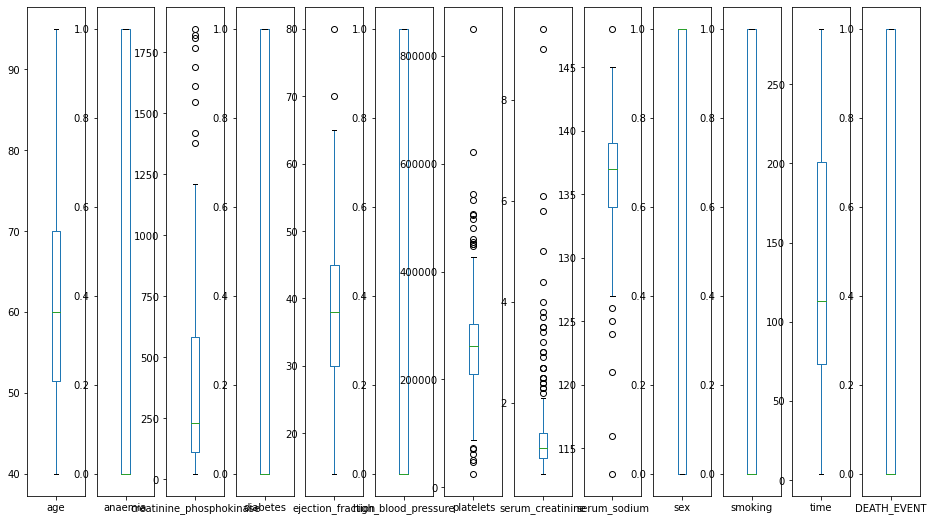

In [64]:
df.plot(kind="box", subplots=True, figsize=(16, 9))

## Working on Model

In [70]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values